# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    try:
        # Parse the JSON and retrieve data
        city_details = requests.get(city_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_details["coord"]["lat"]
        city_lng = city_details["coord"]["lon"]
        city_max_temp = city_details["main"]["temp_max"]
        city_humidity = city_details["main"]["humidity"]
        city_clouds = city_details["clouds"]["all"]
        city_wind = city_details["wind"]["speed"]
        city_country = city_details["sys"]["country"]
        city_date = city_details["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print(city_max_temp)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
81.12
Processing Record 2 of Set 1 | longyearbyen
4.84
Processing Record 3 of Set 1 | wa
City not found. Skipping...
Processing Record 4 of Set 1 | aubigny-sur-nere
47.12
Processing Record 5 of Set 1 | edinburgh of the seven seas
60.91
Processing Record 6 of Set 1 | sitka
46.29
Processing Record 7 of Set 1 | grytviken
26.24
Processing Record 8 of Set 1 | sao joao da barra
73
Processing Record 9 of Set 1 | papatowai
66.61
Processing Record 10 of Set 1 | jinzhou
63.18
Processing Record 11 of Set 1 | adamstown
77.58
Processing Record 12 of Set 1 | tiksi
22.6
Processing Record 13 of Set 1 | susuman
28.74
Processing Record 14 of Set 1 | sumbawanga
55
Processing Record 15 of Set 1 | baker city
60.51
Processing Record 16 of Set 1 | broome
44.85
Processing Record 17 of Set 1 | grand-popo
82.08
Processing Record 18 of Set 1 | bengkulu
84.99
Processing Record 19 of Set 1 | vorgashor
31.66
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
city_details

{'coord': {'lon': -3.6108, 'lat': 57.6113},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 36.46,
  'feels_like': 32.67,
  'temp_min': 32.99,
  'temp_max': 37.29,
  'pressure': 1025,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 210},
 'clouds': {'all': 75},
 'dt': 1682995731,
 'sys': {'type': 1,
  'id': 1463,
  'country': 'GB',
  'sunrise': 1683001326,
  'sunset': 1683057640},
 'timezone': 3600,
 'id': 2649192,
 'name': 'Forres',
 'cod': 200}

In [7]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,81.12,80,50,22.77,MH,1682995465
1,longyearbyen,78.2186,15.6401,4.84,66,20,6.91,SJ,1682995465
2,aubigny-sur-nere,47.4882,2.4390,47.12,86,7,4.54,FR,1682995466
3,edinburgh of the seven seas,-37.0676,-12.3116,60.91,78,19,18.32,SH,1682995466
4,sitka,57.0531,-135.3300,46.29,87,100,9.22,US,1682995467
...,...,...,...,...,...,...,...,...,...
581,shahba,32.8551,36.6290,51.93,50,9,7.20,SY,1682995729
582,hobart,-42.8794,147.3294,64.26,72,40,8.05,AU,1682995730
583,shalqar,47.8333,59.6000,63.39,36,5,16.13,KZ,1682995730
584,rawdon,46.0501,-73.7159,46.63,97,100,4.07,CA,1682995731


In [8]:
import datetime as dt
dt.datetime.fromtimestamp(1682532895)

datetime.datetime(2023, 4, 26, 14, 14, 55)

In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,81.12,80,50,22.77,MH,1682995465
1,longyearbyen,78.2186,15.6401,4.84,66,20,6.91,SJ,1682995465
2,aubigny-sur-nere,47.4882,2.4390,47.12,86,7,4.54,FR,1682995466
3,edinburgh of the seven seas,-37.0676,-12.3116,60.91,78,19,18.32,SH,1682995466
4,sitka,57.0531,-135.3300,46.29,87,100,9.22,US,1682995467
...,...,...,...,...,...,...,...,...,...
581,shahba,32.8551,36.6290,51.93,50,9,7.20,SY,1682995729
582,hobart,-42.8794,147.3294,64.26,72,40,8.05,AU,1682995730
583,shalqar,47.8333,59.6000,63.39,36,5,16.13,KZ,1682995730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

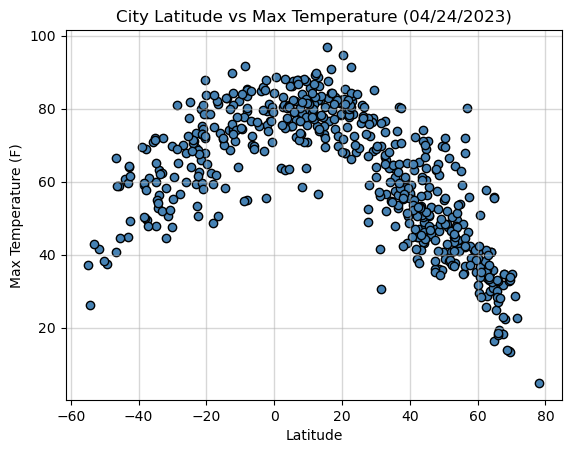

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (04/24/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

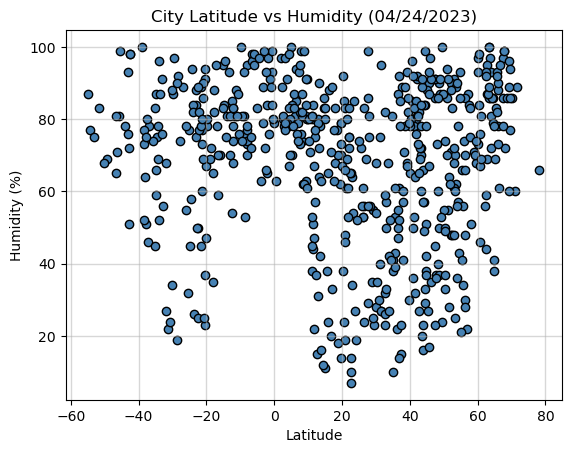

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (04/24/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

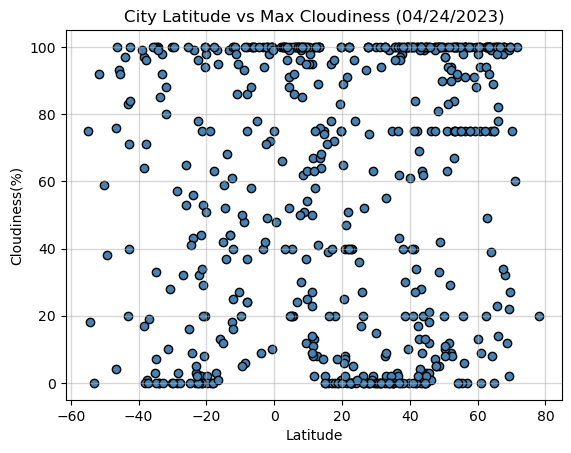

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Cloudiness (04/24/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

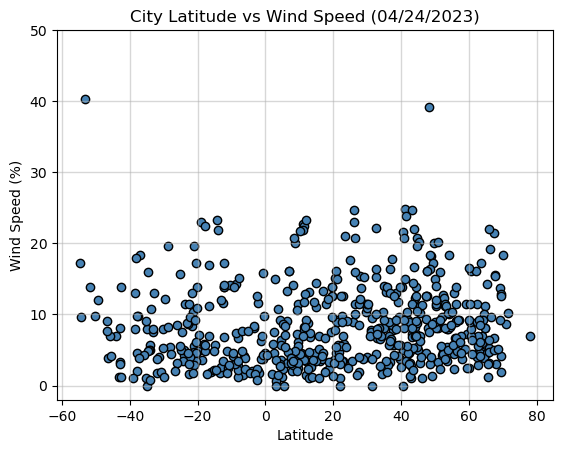

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (04/24/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
import scipy.stats
def linear_agression(x,y,title,coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    print(f"The r-value is: {round(scipy.stats.pearsonr(x, y)[0],2)}")
    plt.ylabel(title)
    
    return line_eq


    


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,81.12,80,50,22.77,MH,1682995465
1,longyearbyen,78.2186,15.6401,4.84,66,20,6.91,SJ,1682995465
2,aubigny-sur-nere,47.4882,2.4390,47.12,86,7,4.54,FR,1682995466
4,sitka,57.0531,-135.3300,46.29,87,100,9.22,US,1682995467
8,jinzhou,41.1078,121.1417,63.18,53,100,24.83,CN,1682995469
...,...,...,...,...,...,...,...,...,...
579,yahyali,38.1023,35.3570,42.28,60,40,4.23,TR,1682995728
581,shahba,32.8551,36.6290,51.93,50,9,7.20,SY,1682995729
583,shalqar,47.8333,59.6000,63.39,36,5,16.13,KZ,1682995730


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,60.91,78,19,18.32,SH,1682995466
5,grytviken,-54.2811,-36.5092,26.24,77,18,9.66,GS,1682995467
6,sao joao da barra,-21.6403,-41.0511,73.00,89,2,3.13,BR,1682995468
7,papatowai,-46.5619,169.4708,66.61,65,76,9.08,NZ,1682995468
9,adamstown,-25.0660,-130.1015,77.58,77,16,15.73,PN,1682995469
...,...,...,...,...,...,...,...,...,...
564,pico truncado,-46.7949,-67.9573,40.86,81,4,7.70,AR,1682995696
570,nuku'alofa,-21.1333,-175.2000,80.94,69,20,19.57,TO,1682995724
574,touros,-5.1989,-35.4608,76.46,83,78,7.61,BR,1682995726


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.87


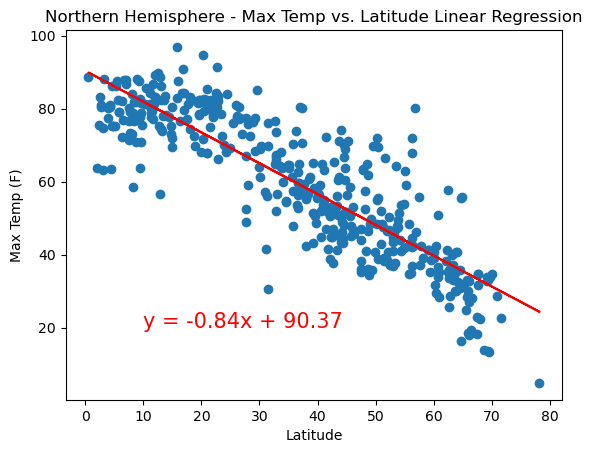

In [18]:
# Linear regression on Northern Hemisphere
linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Max Temp (F)",(10,20))
# annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig5.png")

The r-value is: 0.71


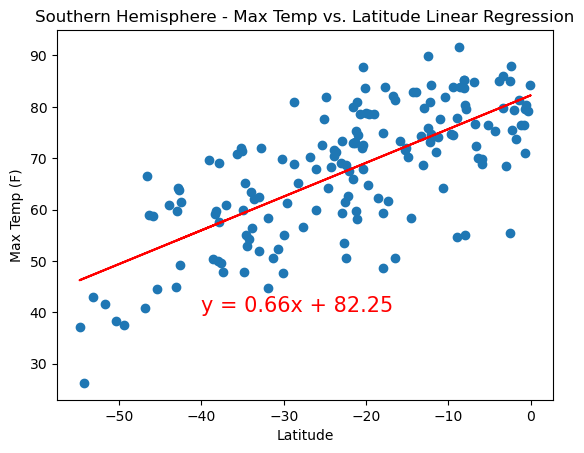

In [19]:
# Linear regression on Southern Hemisphere
linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],"Max Temp (F)",(-40,40))
# annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig6.png")

**Discussion about the linear relationship:** 
There is a strong negative correlation between latitude and max temperature for northern hemisphere.
There is a moderate positive correlation between latitude and max temperature for southern hemisphere.



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07


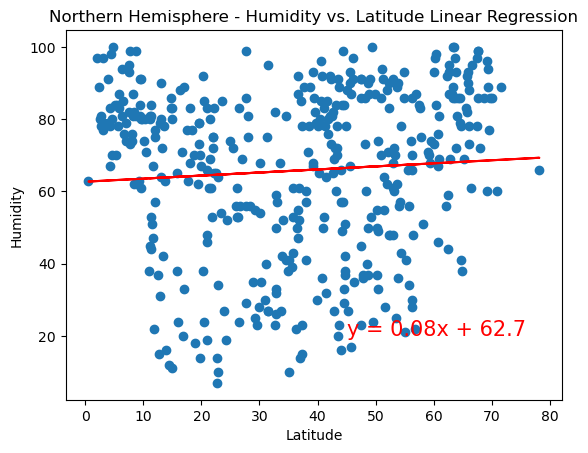

In [20]:
# Northern Hemisphere
linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Humidity",(45,20))
# annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig6.png")


The r-value is: 0.18


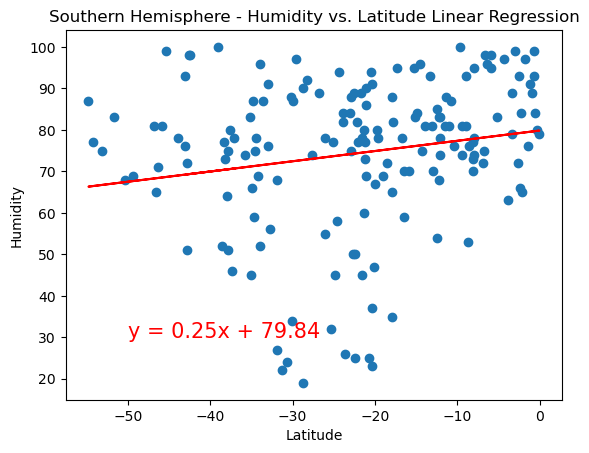

In [21]:
# Southern Hemisphere
linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],"Humidity",(-50,30))
# annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig7.png")


**Discussion about the linear relationship:** 
There is a moderate positive correlation between latitude and humidity for northern hemisphere.
There is a moderate positive correlation between latitude and humidity for southern hemisphere


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11


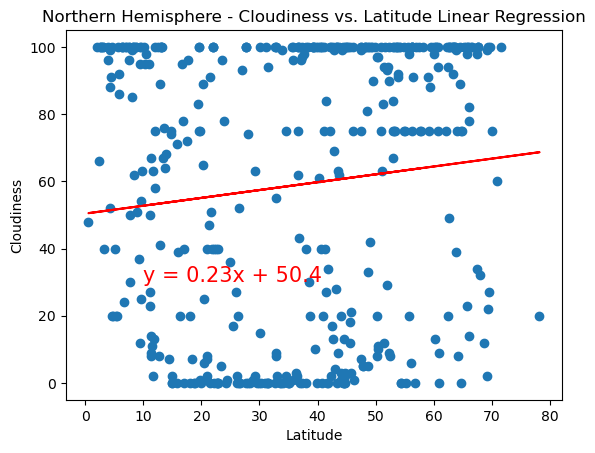

In [22]:
# Northern Hemisphere
linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Cloudiness",(10,30))
# annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig8.png")


The r-value is: 0.13


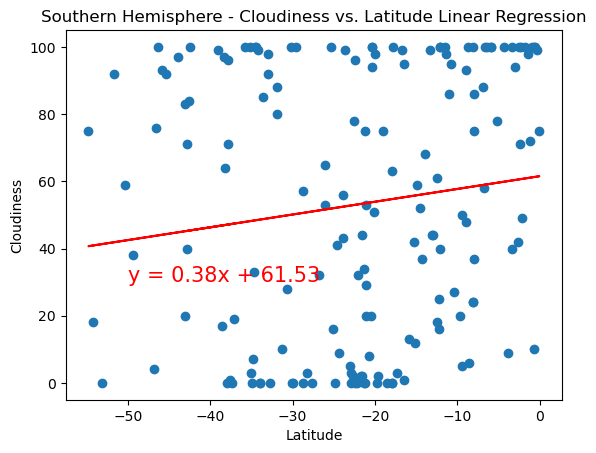

In [23]:
# Southern Hemisphere
linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"Cloudiness",(-50,30))
# annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig9.png")

**Discussion about the linear relationship:** 
There is a weak negative correlation between latitude and cloudiness for northern hemisphere.
There is a weak positive correlation between latitude and cloudiness for southern hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12


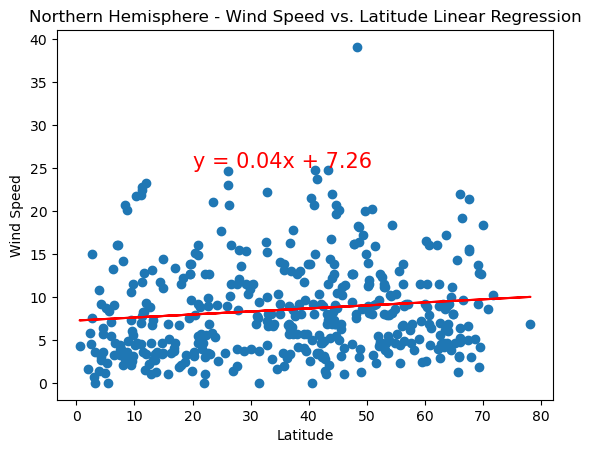

In [24]:
# Northern Hemisphere
linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Wind Speed",(20,25))
# annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig9.png")

The r-value is: -0.15


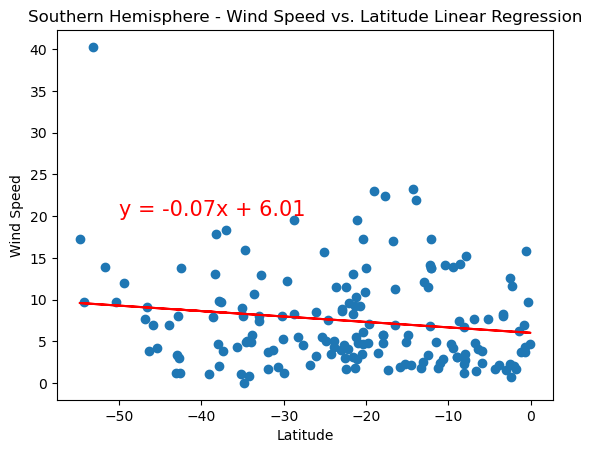

In [25]:
# Southern Hemisphere
linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"Wind Speed",(-50,20))
# annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig10.png")

**Discussion about the linear relationship:** 
There is a weak positive correlation between latitude and windspeed for northern hemisphere.
There is a weak negative correlation between latitude and wind speed for southern hemisphere.